In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import *
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [3]:
u='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
c1 = "Date,Country_Region,Last_Update,Lat,Long_,Confirmed,"
c2 = "Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,"
c3 = "Testing_Rate,Hospitalization_Rate"
labels = c1+c2+c3
cols = labels.split(',')
print cols

['Date', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate']


In [4]:
df_all = pd.DataFrame(columns = cols)
start_date = datetime.date(2020, 4, 12)
end_date = datetime.date(2020, 7, 13)
delta = datetime.timedelta(days=1)
date = start_date
while(date <= end_date):
    date_df = pd.DataFrame(columns = [date])
    if(date.month/10 ==0):
        mo = '0' + str(date.month)
    else:
        mo = str(date.month)
    if(date.day /10 ==0):
        day = '0'+ str(date.day)
    else:
        day = str(date.day)
    url = u + mo +'-'+ day +'-' + str(date.year)+".csv"
    df = pd.read_csv(url, index_col =0)
    df_all = pd.concat([df_all, df])
    if(date == start_date):
        print len(df_all.index)
    date += delta

59


In [5]:
df_all = df_all.reset_index()

In [6]:
df_az = df_all.loc[df_all['index']=="Arizona"]
df_az = df_az.reset_index()
conf_az = df_az['Confirmed']

df_ny = df_all.loc[df_all['index']=="New York"]
df_ny = df_ny.reset_index()
conf_ny = df_ny['Confirmed']

df_sc = df_all.loc[df_all['index']=="South Carolina"]
df_sc = df_sc.reset_index()
conf_sc = df_sc['Confirmed']

df_nj = df_all.loc[df_all['index']=="New Jersey"]
df_nj = df_nj.reset_index()
conf_nj = df_nj['Confirmed']

df_ma = df_all.loc[df_all['index']=="Massachusetts"]
df_ma = df_ma.reset_index()
conf_ma = df_ma['Confirmed']

df_ga = df_all.loc[df_all['index']=="Georgia"]
df_ga = df_ga.reset_index()
conf_ga = df_ga['Confirmed']

df_mi = df_all.loc[df_all['index']=="Michigan"]
df_mi = df_mi.reset_index()
conf_mi = df_mi['Confirmed']

df_fl = df_all.loc[df_all['index']=="Florida"]
df_fl = df_fl.reset_index()
conf_fl = df_fl['Confirmed']

df_ca = df_all.loc[df_all['index']=="California"]
df_ca = df_ca.reset_index()
conf_ca = df_ca['Confirmed']

df_wa = df_all.loc[df_all['index']=="Washington"]
df_wa = df_wa.reset_index()
conf_wa = df_wa['Confirmed']



In [7]:
test_period = 20

train_az = df_az.iloc[:-test_period]
test_az = df_az.iloc[-test_period:]


train_ny = df_ny.iloc[:-test_period]
test_ny = df_ny.iloc[-test_period:]


train_nj = df_nj.iloc[:-test_period]
test_nj = df_nj.iloc[-test_period:]


train_mi = df_mi.iloc[:-test_period]
test_mi = df_mi.iloc[-test_period:]


train_sc = df_sc.iloc[:-test_period]
test_sc = df_sc.iloc[-test_period:]


train_ga = df_ga.iloc[:-test_period]
test_ga = df_ga.iloc[-test_period:]


train_fl = df_fl.iloc[:-test_period]
test_fl = df_fl.iloc[-test_period:]


train_ca = df_ca.iloc[:-test_period]
test_ca = df_ca.iloc[-test_period:]


train_wa = df_wa.iloc[:-test_period]
test_wa = df_wa.iloc[-test_period:]


train_ma = df_ma.iloc[:-test_period]
test_ma = df_ma.iloc[-test_period:]

In [8]:
train_ny = train_ny["Confirmed"]
test_ny = test_ny["Confirmed"]

train_nj = train_nj["Confirmed"]
test_nj = test_nj["Confirmed"]

train_ma = train_ma["Confirmed"]
test_ma = test_ma["Confirmed"]

train_ca = train_ca["Confirmed"]
test_ca = test_ca["Confirmed"]

train_wa = train_wa["Confirmed"]
test_wa = test_wa["Confirmed"]

train_mi = train_mi["Confirmed"]
test_mi = test_mi["Confirmed"]

train_ga = train_ga["Confirmed"]
test_ga = test_ga["Confirmed"]

train_az = train_az["Confirmed"]
test_az = test_az["Confirmed"]

train_sc = train_sc["Confirmed"]
test_sc = test_sc["Confirmed"]

train_fl = train_fl["Confirmed"]
test_fl = test_fl["Confirmed"]

In [9]:
trend_removed_ny = train_ny.diff()
trend_removed_nj = train_nj.diff()
trend_removed_ca = train_ca.diff()
trend_removed_ma = train_ma.diff()
trend_removed_wa = train_wa.diff()
trend_removed_sc = train_sc.diff()
trend_removed_fl = train_fl.diff()
trend_removed_az = train_az.diff()
trend_removed_mi = train_mi.diff()
trend_removed_ga = train_ga.diff()


In [10]:
t_train_ny = np.arange(len(train_ny)).reshape(-1,1)
trend_removed_ny = trend_removed_ny / ((t_train_ny+1)**(1/2)).reshape(-1)
t_train_nj = np.arange(len(train_nj)).reshape(-1,1)
trend_removed_nj = trend_removed_nj / ((t_train_nj+1)**(1/2)).reshape(-1)
t_train_wa = np.arange(len(train_wa)).reshape(-1,1)
trend_removed_wa = trend_removed_wa / ((t_train_wa+1)**(1/2)).reshape(-1)
t_train_ma = np.arange(len(train_ma)).reshape(-1,1)
trend_removed_ma = trend_removed_ma / ((t_train_ma+1)**(1/2)).reshape(-1)
t_train_ca = np.arange(len(train_ca)).reshape(-1,1)
trend_removed_ca = trend_removed_ca / ((t_train_ca+1)**(1/2)).reshape(-1)
t_train_sc = np.arange(len(train_sc)).reshape(-1,1)
trend_removed_sc = trend_removed_sc / ((t_train_sc+1)**(1/2)).reshape(-1)
t_train_az = np.arange(len(train_az)).reshape(-1,1)
trend_removed_az = trend_removed_az / ((t_train_az+1)**(1/2)).reshape(-1)
t_train_ga = np.arange(len(train_ga)).reshape(-1,1)
trend_removed_ga = trend_removed_ga / ((t_train_ga+1)**(1/2)).reshape(-1)
t_train_mi = np.arange(len(train_mi)).reshape(-1,1)
trend_removed_mi = trend_removed_mi / ((t_train_mi+1)**(1/2)).reshape(-1)
t_train_fl = np.arange(len(train_fl)).reshape(-1,1)
trend_removed_fl = trend_removed_fl / ((t_train_fl+1)**(1/2)).reshape(-1)



In [12]:
n_bins = 40
bins_fl = np.linspace(trend_removed_fl.min(), trend_removed_fl.max(), n_bins)
binned_fl = np.digitize(trend_removed_fl, bins_fl)
binned_series_fl = pd.Series(binned_fl, index = trend_removed_fl.index)

In [13]:
bin_means_fl = {}

for binn in range(1,n_bins+1):
    bin_means_fl[binn] = trend_removed_fl[binned_fl == binn].mean()

In [14]:
lagged_list_fl = []
for s in range(30):
    lagged_list_fl.append(binned_series_fl.shift(s))
    
lagged_frame_fl = pd.concat(lagged_list_fl,1).dropna()

train_X_fl = lagged_frame_fl.iloc[:,1:]
train_y_fl = lagged_frame_fl.iloc[:,0]

In [15]:
train_X_fl.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
29,4.0,6.0,1.0,6.0,3.0,3.0,6.0,4.0,5.0,8.0,...,6.0,5.0,6.0,5.0,12.0,6.0,7.0,4.0,40.0,40.0
30,1.0,4.0,6.0,1.0,6.0,3.0,3.0,6.0,4.0,5.0,...,2.0,6.0,5.0,6.0,5.0,12.0,6.0,7.0,4.0,40.0
31,7.0,1.0,4.0,6.0,1.0,6.0,3.0,3.0,6.0,4.0,...,11.0,2.0,6.0,5.0,6.0,5.0,12.0,6.0,7.0,4.0
32,2.0,7.0,1.0,4.0,6.0,1.0,6.0,3.0,3.0,6.0,...,7.0,11.0,2.0,6.0,5.0,6.0,5.0,12.0,6.0,7.0
33,6.0,2.0,7.0,1.0,4.0,6.0,1.0,6.0,3.0,3.0,...,1.0,7.0,11.0,2.0,6.0,5.0,6.0,5.0,12.0,6.0


In [20]:
def get_mean_from_class(prediction):
    
    return(bin_means_fl[prediction[0]])

In [21]:
model = GaussianNB()
model.fit(train_X_fl, train_y_fl)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
pred_insample = model.predict(train_X_fl)
pred_insample = pd.DataFrame(pred_insample, index = train_y_fl.index)

resulting_prediction = pd.Series(np.nan, index = train_y_fl.index)
for row in range(len(pred_insample)):
    resulting_prediction.iloc[row] = get_mean_from_class(pred_insample.values[row])

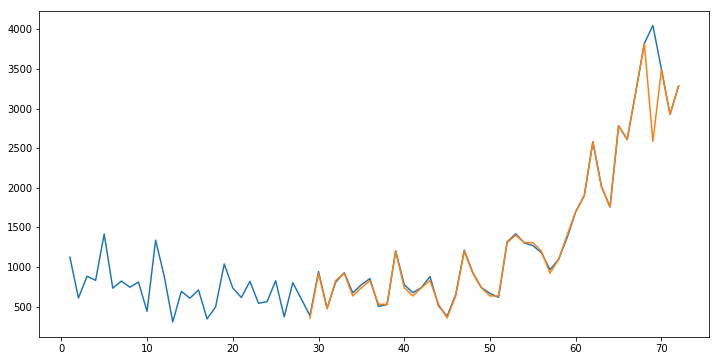

In [24]:
plt.figure(figsize = (12,6))
plt.plot(trend_removed_fl)
plt.plot(resulting_prediction)

In [26]:
prediction_frame = pd.DataFrame(np.nan, index = test_fl.index, columns = range(train_X_fl.shape[1]))
predictions = pd.Series(index = test_fl.index)

prediction_frame.iloc[0,1:] = train_X_fl.iloc[-1,:-1].values
prediction_frame.iloc[0,0] = train_y_fl.iloc[-1]

In [28]:
for i in range(len(test_fl)):
    pred = model.predict(prediction_frame.iloc[i,:].values.reshape(1,-1))
    pred_num = get_mean_from_class(pred.reshape(-1))
    predictions.iloc[i] = pred_num
    try:
        prediction_frame.iloc[i+1,1:] = prediction_frame.iloc[i,:-1].values
        prediction_frame.iloc[i+1,0] = pred[0]
    except:
        pass

In [32]:
trend_test = np.arange(len(train_fl),len(train_fl)+len(test_fl)).reshape(-1,1)

final_prediction = predictions.cumsum()* ((trend_test+1)**(1/2)).reshape(-1)+train_fl.iloc[-1]

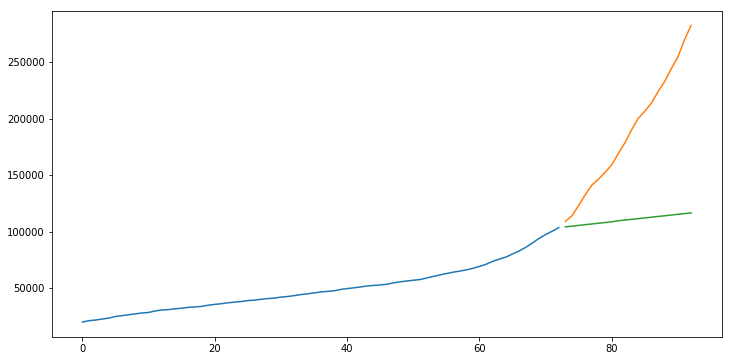

In [34]:
plt.figure(figsize = (12,6))
plt.plot(train_fl)
plt.plot(test_fl)
plt.plot(final_prediction)